In [1]:
from numpy import *
import numpy as np
from sympy import *
import sympy as sy
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Math
from scipy.signal import argrelextrema

### Enunciado

Foi estudado no Capítulo 2 da disciplina que uma das curvas obtidas experimentalmente e mais importantes 
na análise da combustão é a curva de pressão no cilindro versus ângulo do virabrequim (𝑝 × 𝜃). Considere no 
desenvolvimento desse trabalho a curva 𝑝 × 𝜃 presente o arquivo de planilha Excel enviado em anexo na 
tarefa criada no Teams. Essa curva é para um motor Diesel monocilindro operando com diesel S10, no 
intervalo −360° a 360°. No arquivo, a coluna “CA [°]” refere-se aos ângulos do virabrequim, em graus, e a 
coluna “p [bar]” refere-se à pressão no cilindro, em bar. Alguns dados do motor: raio da manivela = 38 mm; 
comprimento da biela = 118 mm; diâmetro do pistão = 86 mm; volume morto = 23,334 cm3; curso do pistão 
= 72 mm 

**a)** O motor utilizado nos experimentos é um motor 2T ou 4T? Justifique sua resposta. 

In [2]:
data = pd.read_excel('Dados Trabalho TACE.xlsx')
data.head()

,CA [°],p [bar]
0,-360.0,1.064
1,-359.5,1.055
2,-359.0,1.048
3,-358.5,1.038
4,-358.0,1.025


In [3]:
eixo_x = data['CA [°]'].values
eixo_y = data['p [bar]'].values

 **b)** Esboce o gráfico, nomeie e formate os eixos para a curva 𝑝 × 𝜃.

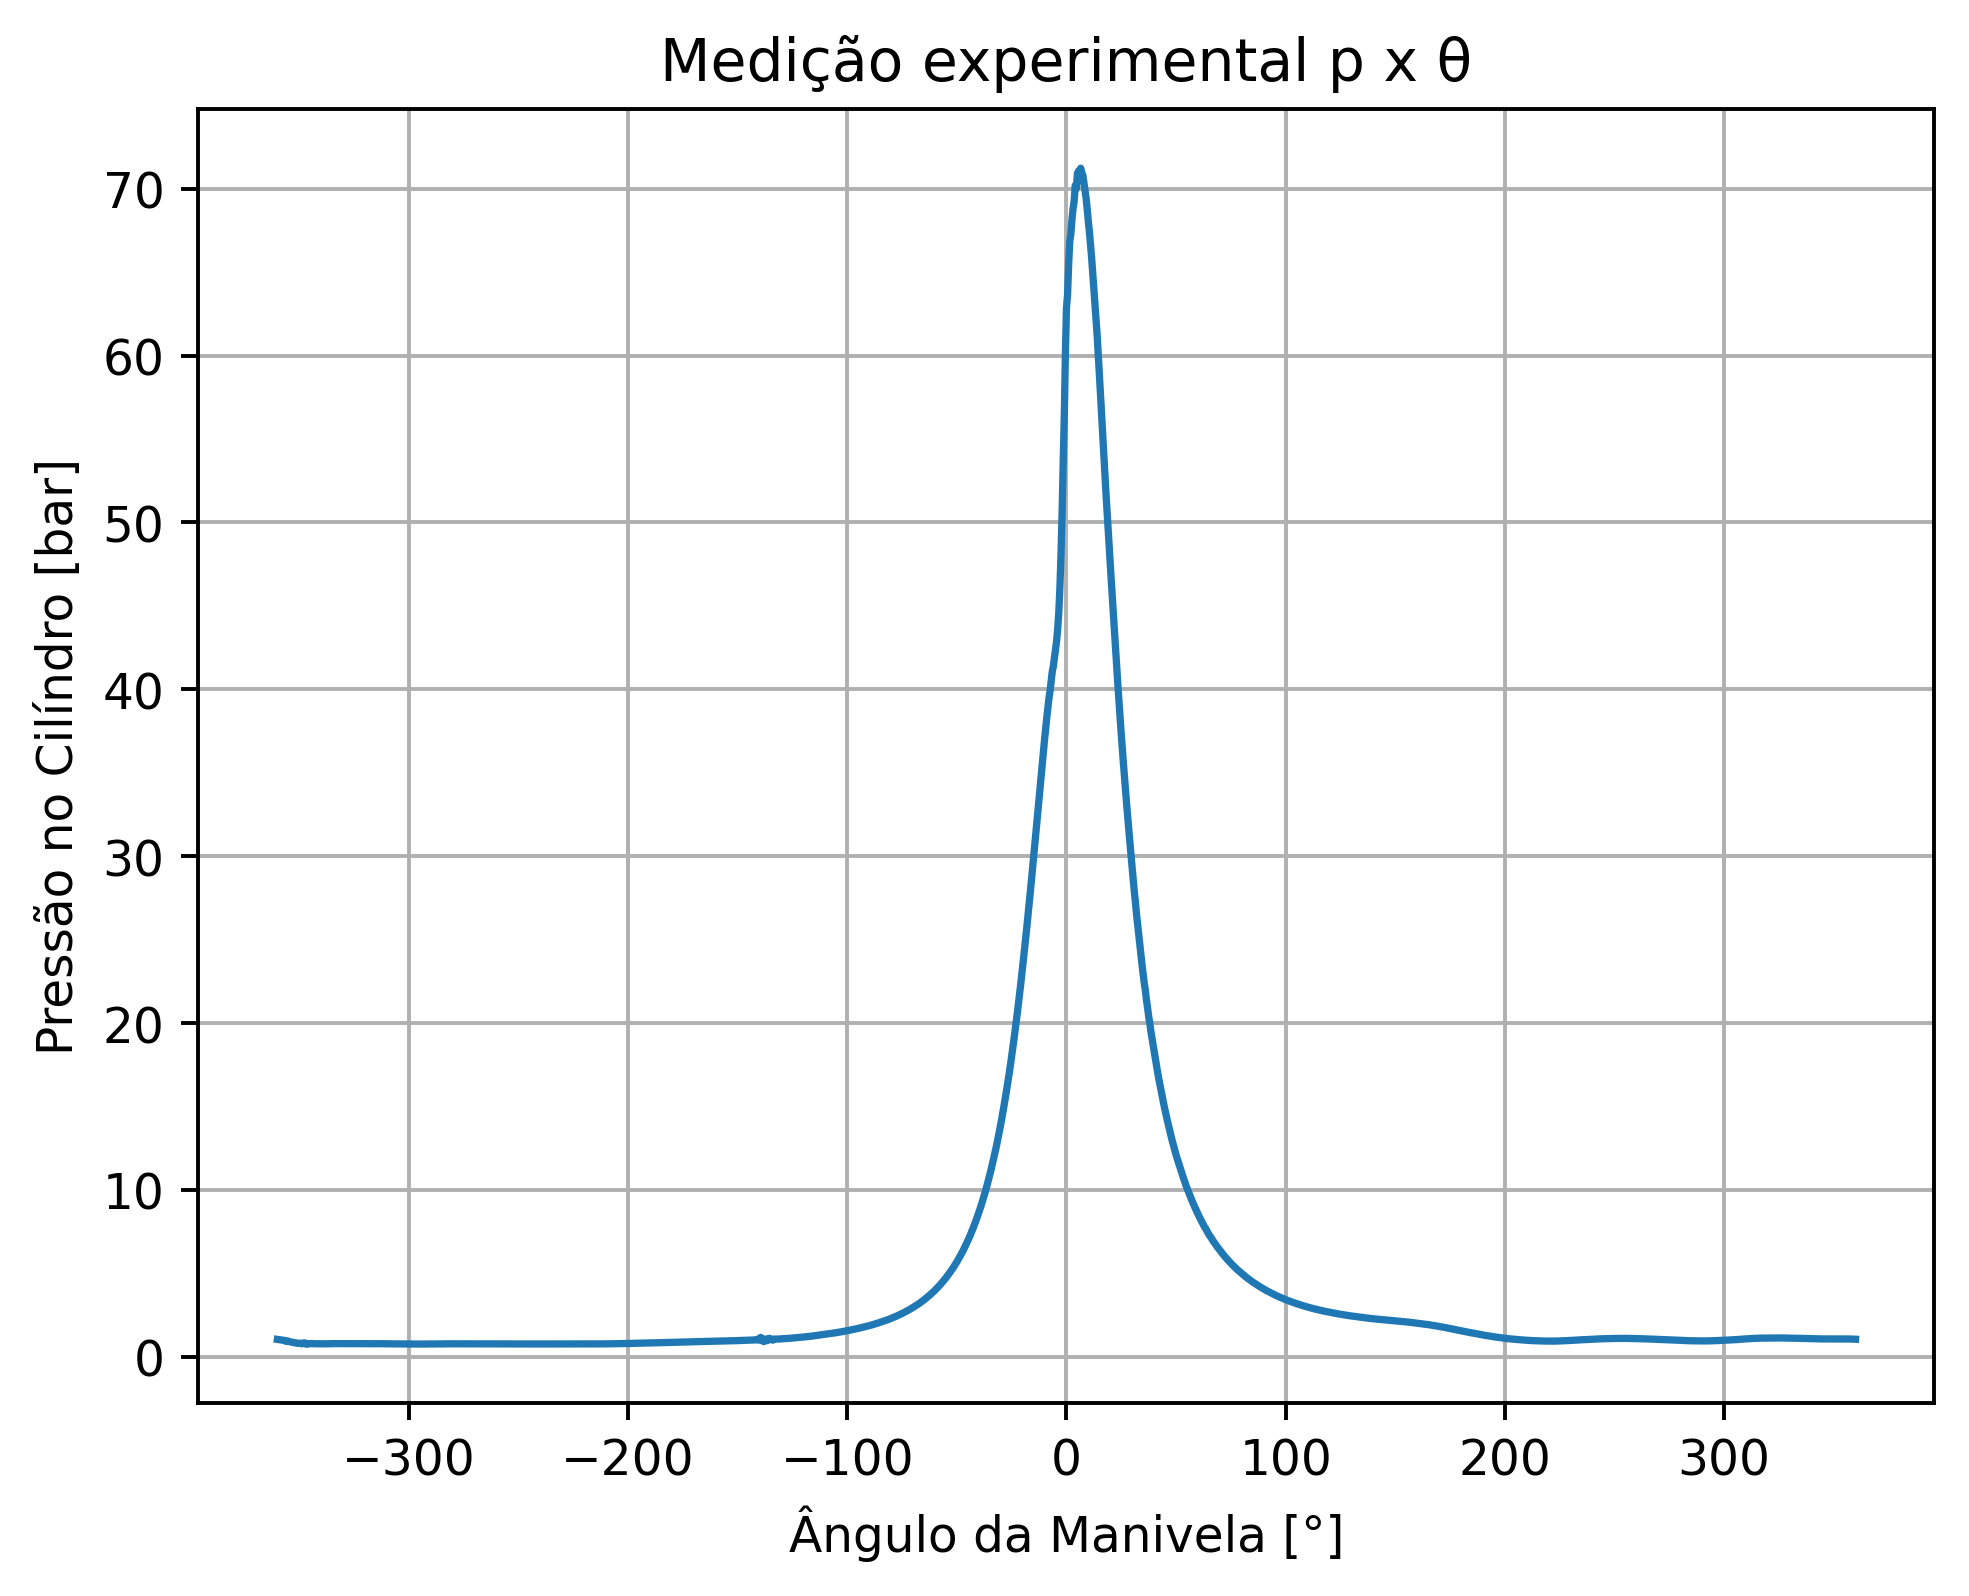

In [4]:
plt.figure(dpi=350)
plt.plot(eixo_x,eixo_y)
plt.title('Medição experimental p x θ')
plt.xlabel('Ângulo da Manivela [°]')
plt.ylabel('Pressão no Cilíndro [bar]')
plt.grid(True)
plt.show()

**c)** Obtenha o pico de pressão no cilindro, ou seja, o valor máximo de 𝑝 e onde ele ocorre. 

In [5]:
pico_pressao = np.max(eixo_y)

angulo_pico = eixo_x[np.argmax(eixo_y)]
display(Math(r' \text{O pico de pressão é } %.3f \, \text{ bar.}'%pico_pressao))
display(Math(r' \text{O ângulo onde ocorre o pico de pressão é } %.2f \, \text{°.}'%angulo_pico))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**d)** Calcule a derivada 𝑑𝑝/𝑑𝜃, conhecida como Pressure Rise Rate (PRR), para todos os pontos dados, considerando aproximações numéricas para a derivada primeira.

Nesta etapa, buscar-se-á calcular a taxa de variação da pressão em relação ao ângulo do virabrequim, isto é, $\frac{dp}{d\theta}$. Para tanto, será utilizada a técnica de aproximação por diferenças finitas centrais, aonde:

$$\frac{dp}{d\theta} \approx \frac{p(\theta_{i + 1}) - p(\theta_{i - 1})}{\theta_{i + 1} - \theta_{i - 1}}$$

Em python, pode-se utilizar a função np.gradient da biblioteca numpy para fazer esses cálculos.

In [6]:
dp_dtheta = np.gradient(eixo_y, eixo_x, edge_order=1)
df_dp_dtheta = pd.DataFrame(dp_dtheta)
x = max(df_dp_dtheta)
df_dp_dtheta.head()

,0
0,-0.018
1,-0.016
2,-0.017
3,-0.023
4,-0.022


Ressalta-se que um valor positivo de $\frac{dp}{d\theta}$ indica que a pressão está aumentando com o ângulo, enquanto um valor negativo indica que a pressão está diminuindo com o ângulo.

**e)** Esboce o gráfico, nomeie e formate os eixos para a curva 𝑑𝑝 × 𝑑𝜃.

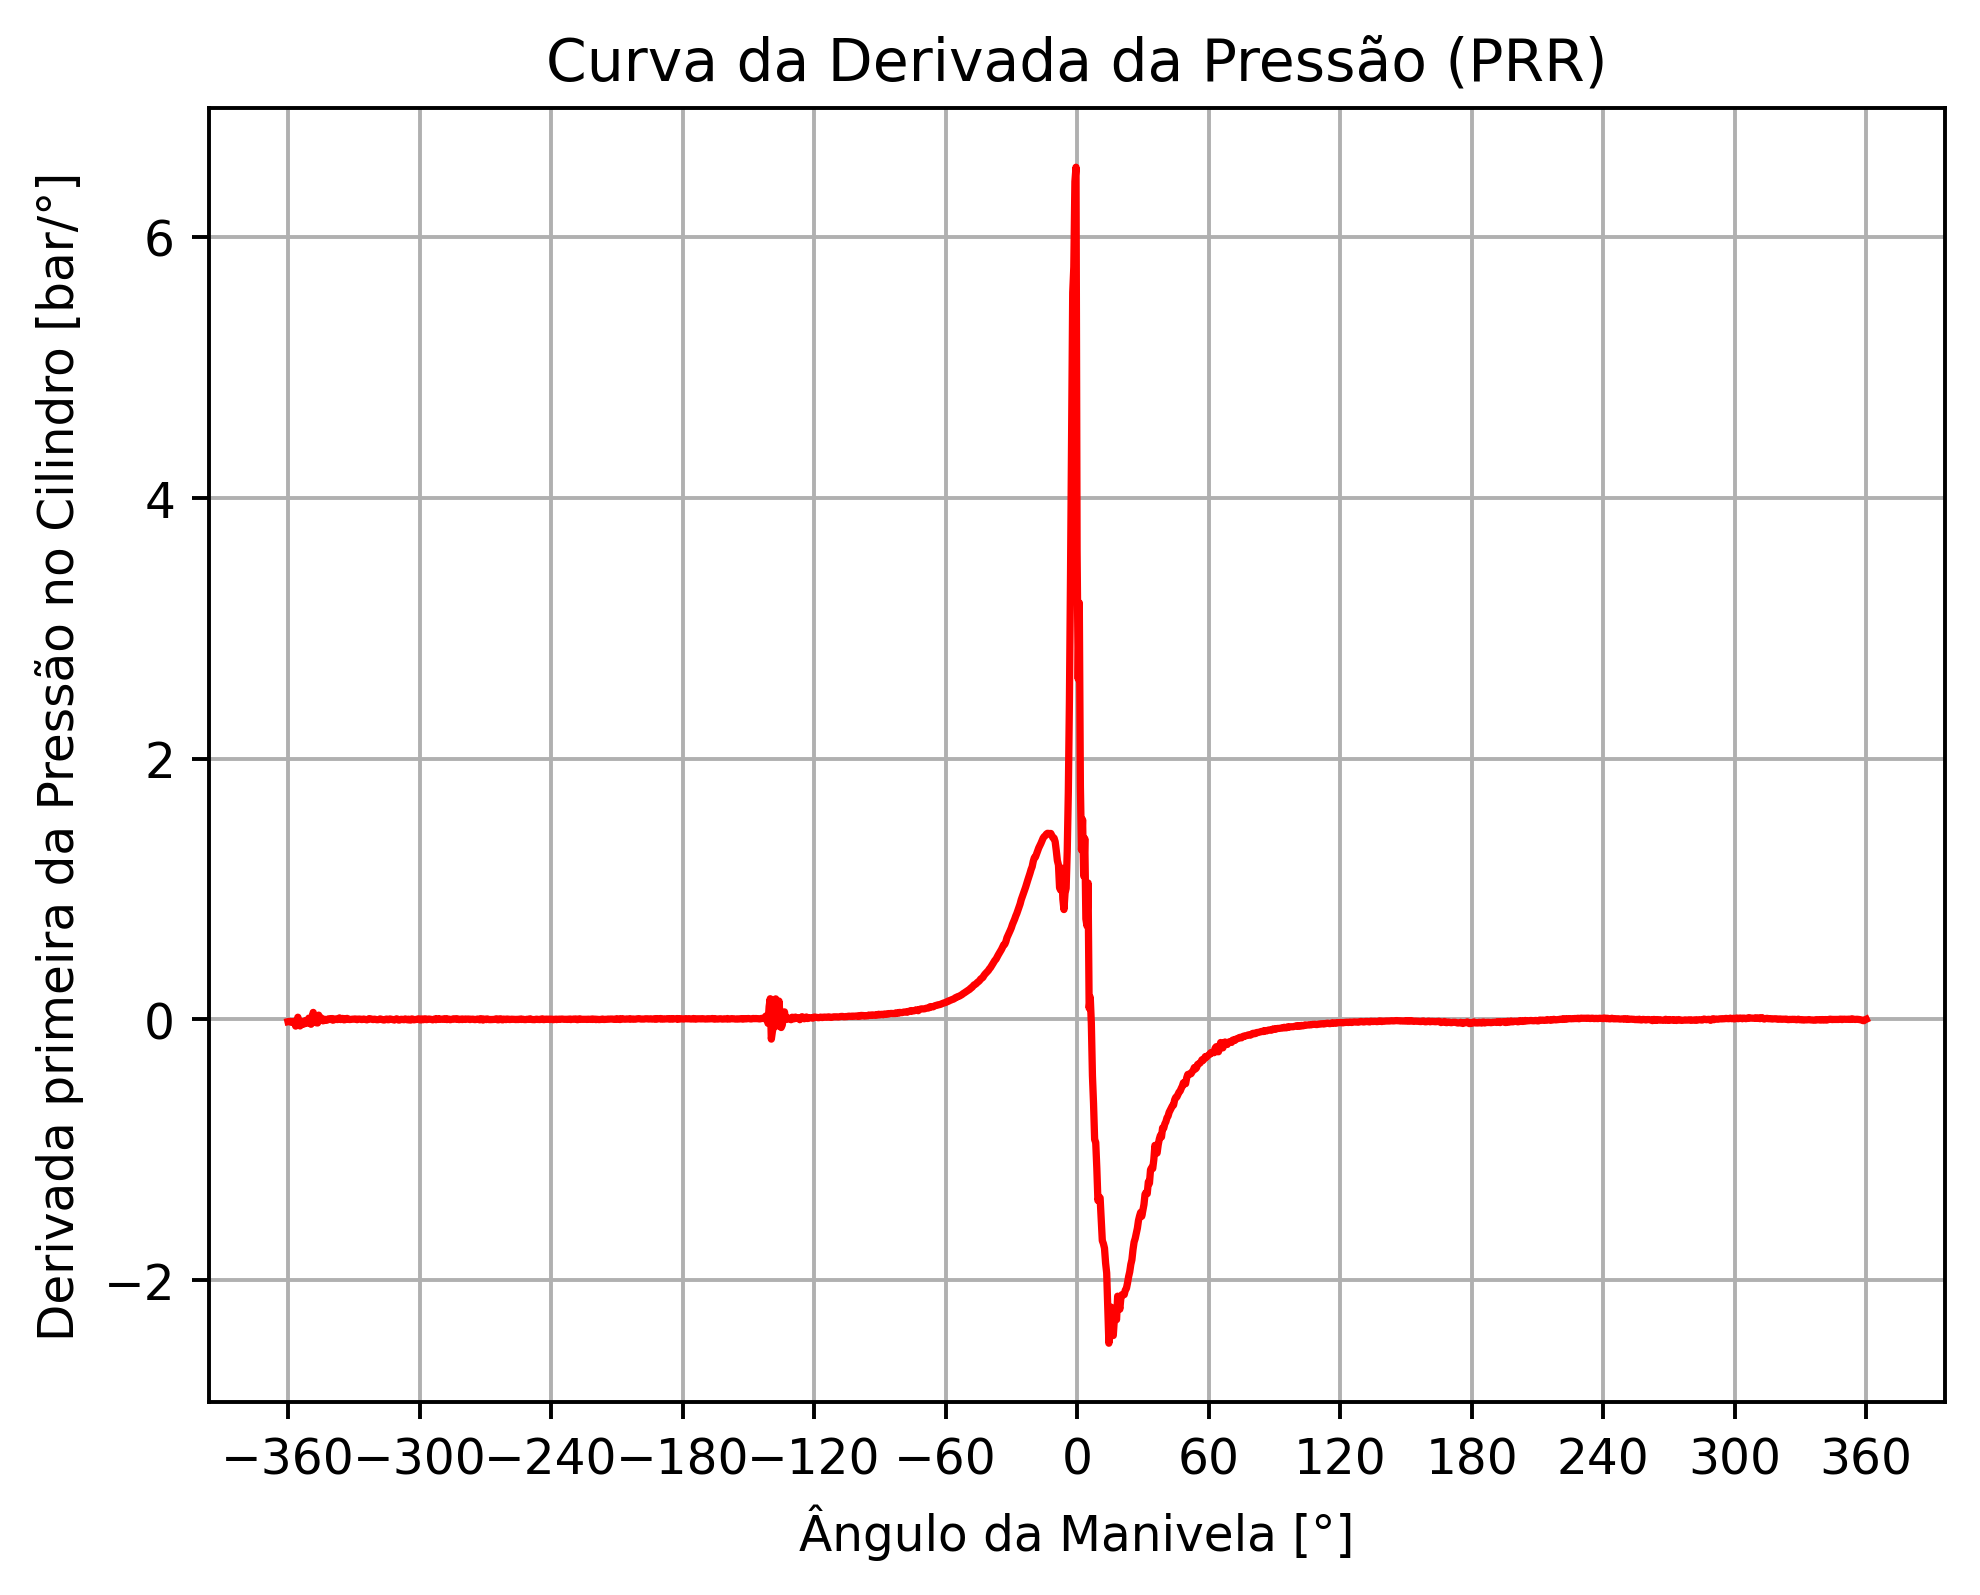

In [7]:
plt.figure(dpi=350)
plt.plot(eixo_x, dp_dtheta, color='red')
plt.title('Curva da Derivada da Pressão (PRR)')
plt.xlabel('Ângulo da Manivela [°]')
plt.ylabel('Derivada primeira da Pressão no Cilindro [bar/°]')
plt.grid(True)
plt.xticks(np.arange(-360, 361, 60))
plt.show()

**f)** Obtenha o valor máximo da derivada da pressão no cilindro e onde ele ocorre. 

In [8]:
pico_prr = np.max(dp_dtheta)
angulo_pico_prr = eixo_x[np.argmax(dp_dtheta)]
display(Math(r'\text{Máximo valor da derivada da pressão do cilíndro é } %.3f \, \text{bar/°}' % pico_prr))
display(Math(r' \text{O ângulo onde ocorre o valor máximo da derivada da pressão do cilíndro é } %.2f \, \text{°.}'%angulo_pico_prr))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**g)** Considerando a equação que relaciona o volume do cilindro com o ângulo do virabrequim, aprendida 
em aula, e os dados apresentados, obtenha uma coluna de dados para o volume do cilindro 𝑉 em função 
do ângulo do virabrequim.

In [9]:
# Declarando as variáveis de entrada
r,L,V2,Dp,theta = sy.symbols('r L V2 Dp theta')

# Criando um dicionário com os valores de entrada 
dic = {r:3.8, L:11.8, V2:23.334, Dp:8.6}

# Convertendo os ângulos para radianos 
theta_rad = np.radians(eixo_x)


x = r*(1 - sy.cos(theta)) + L*(1 - sy.sqrt(1 - (r/L)**2*sy.sin(theta)**2))
x

L*(1 - sqrt(1 - r**2*sin(theta)**2/L**2)) + r*(1 - cos(theta))

In [10]:
Vd = V2 + ((sy.pi * Dp**2)/4) * x
Vd

pi*Dp**2*(L*(1 - sqrt(1 - r**2*sin(theta)**2/L**2)) + r*(1 - cos(theta)))/4 + V2

In [11]:
Vd.subs(dic)

18.49*pi*(-11.8*sqrt(1 - 0.10370583165757*sin(theta)**2) - 3.8*cos(theta) + 15.6) + 23.334

In [12]:
Vd_numerico = [Vd.subs(dic).evalf(subs={theta: t}) for t in theta_rad]

In [13]:
df = pd.DataFrame({
    'Angulo da Manivela (°)': eixo_x,
    'Volume do Cilindro (cm³)': Vd_numerico
})

df.head()


,Angulo da Manivela (°),Volume do Cilindro (cm³)
0,-360.0,23.3340000000001
1,-359.5,23.3451115119681
2,-359.0,23.3784446474615
3,-358.5,23.4339952054574
4,-358.0,23.5117561849507


**h)** Esboce o gráfico, nomeie e formate os eixos para a curva 𝑉 × 𝜃.

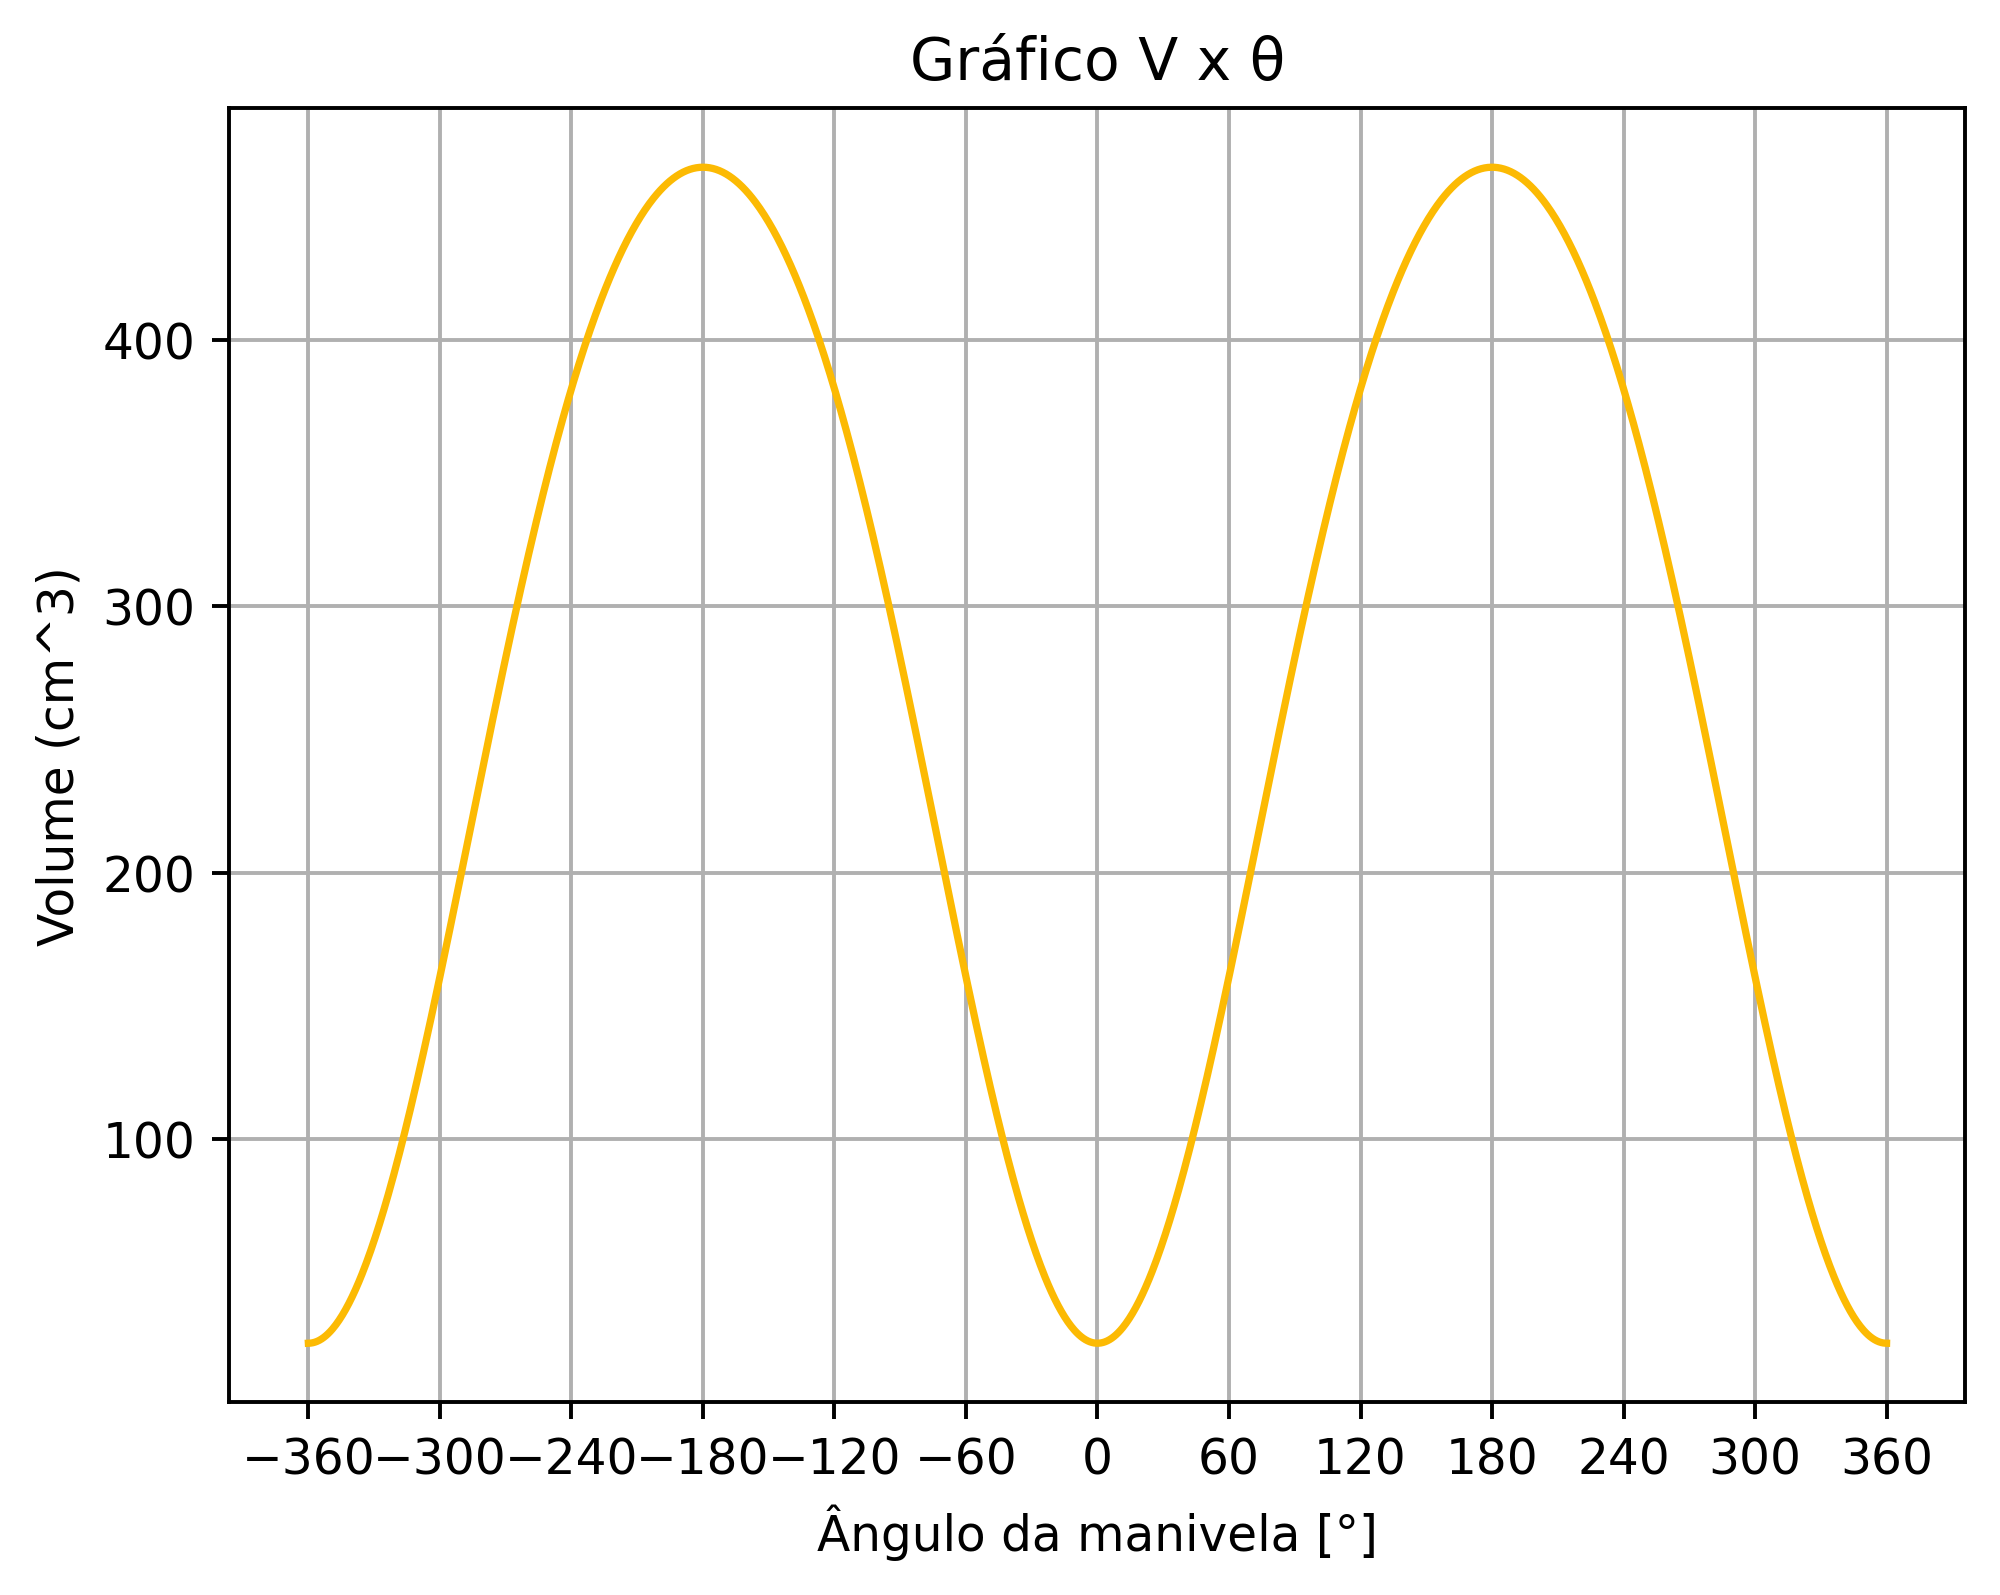

In [14]:
plt.figure(dpi = 350)
plt.plot(eixo_x,Vd_numerico,color='#fcba03')
plt.title('Gráfico V x θ')
plt.xlabel('Ângulo da manivela [°]')
plt.xticks(np.arange(-360, 361, 60))
plt.ylabel('Volume (cm^3)')
plt.grid(True)
plt.savefig("V x theta.png")
plt.show()

**i)** Esboce o gráfico, nomeie e formate os eixos para a curva 𝑝 × 𝑉.

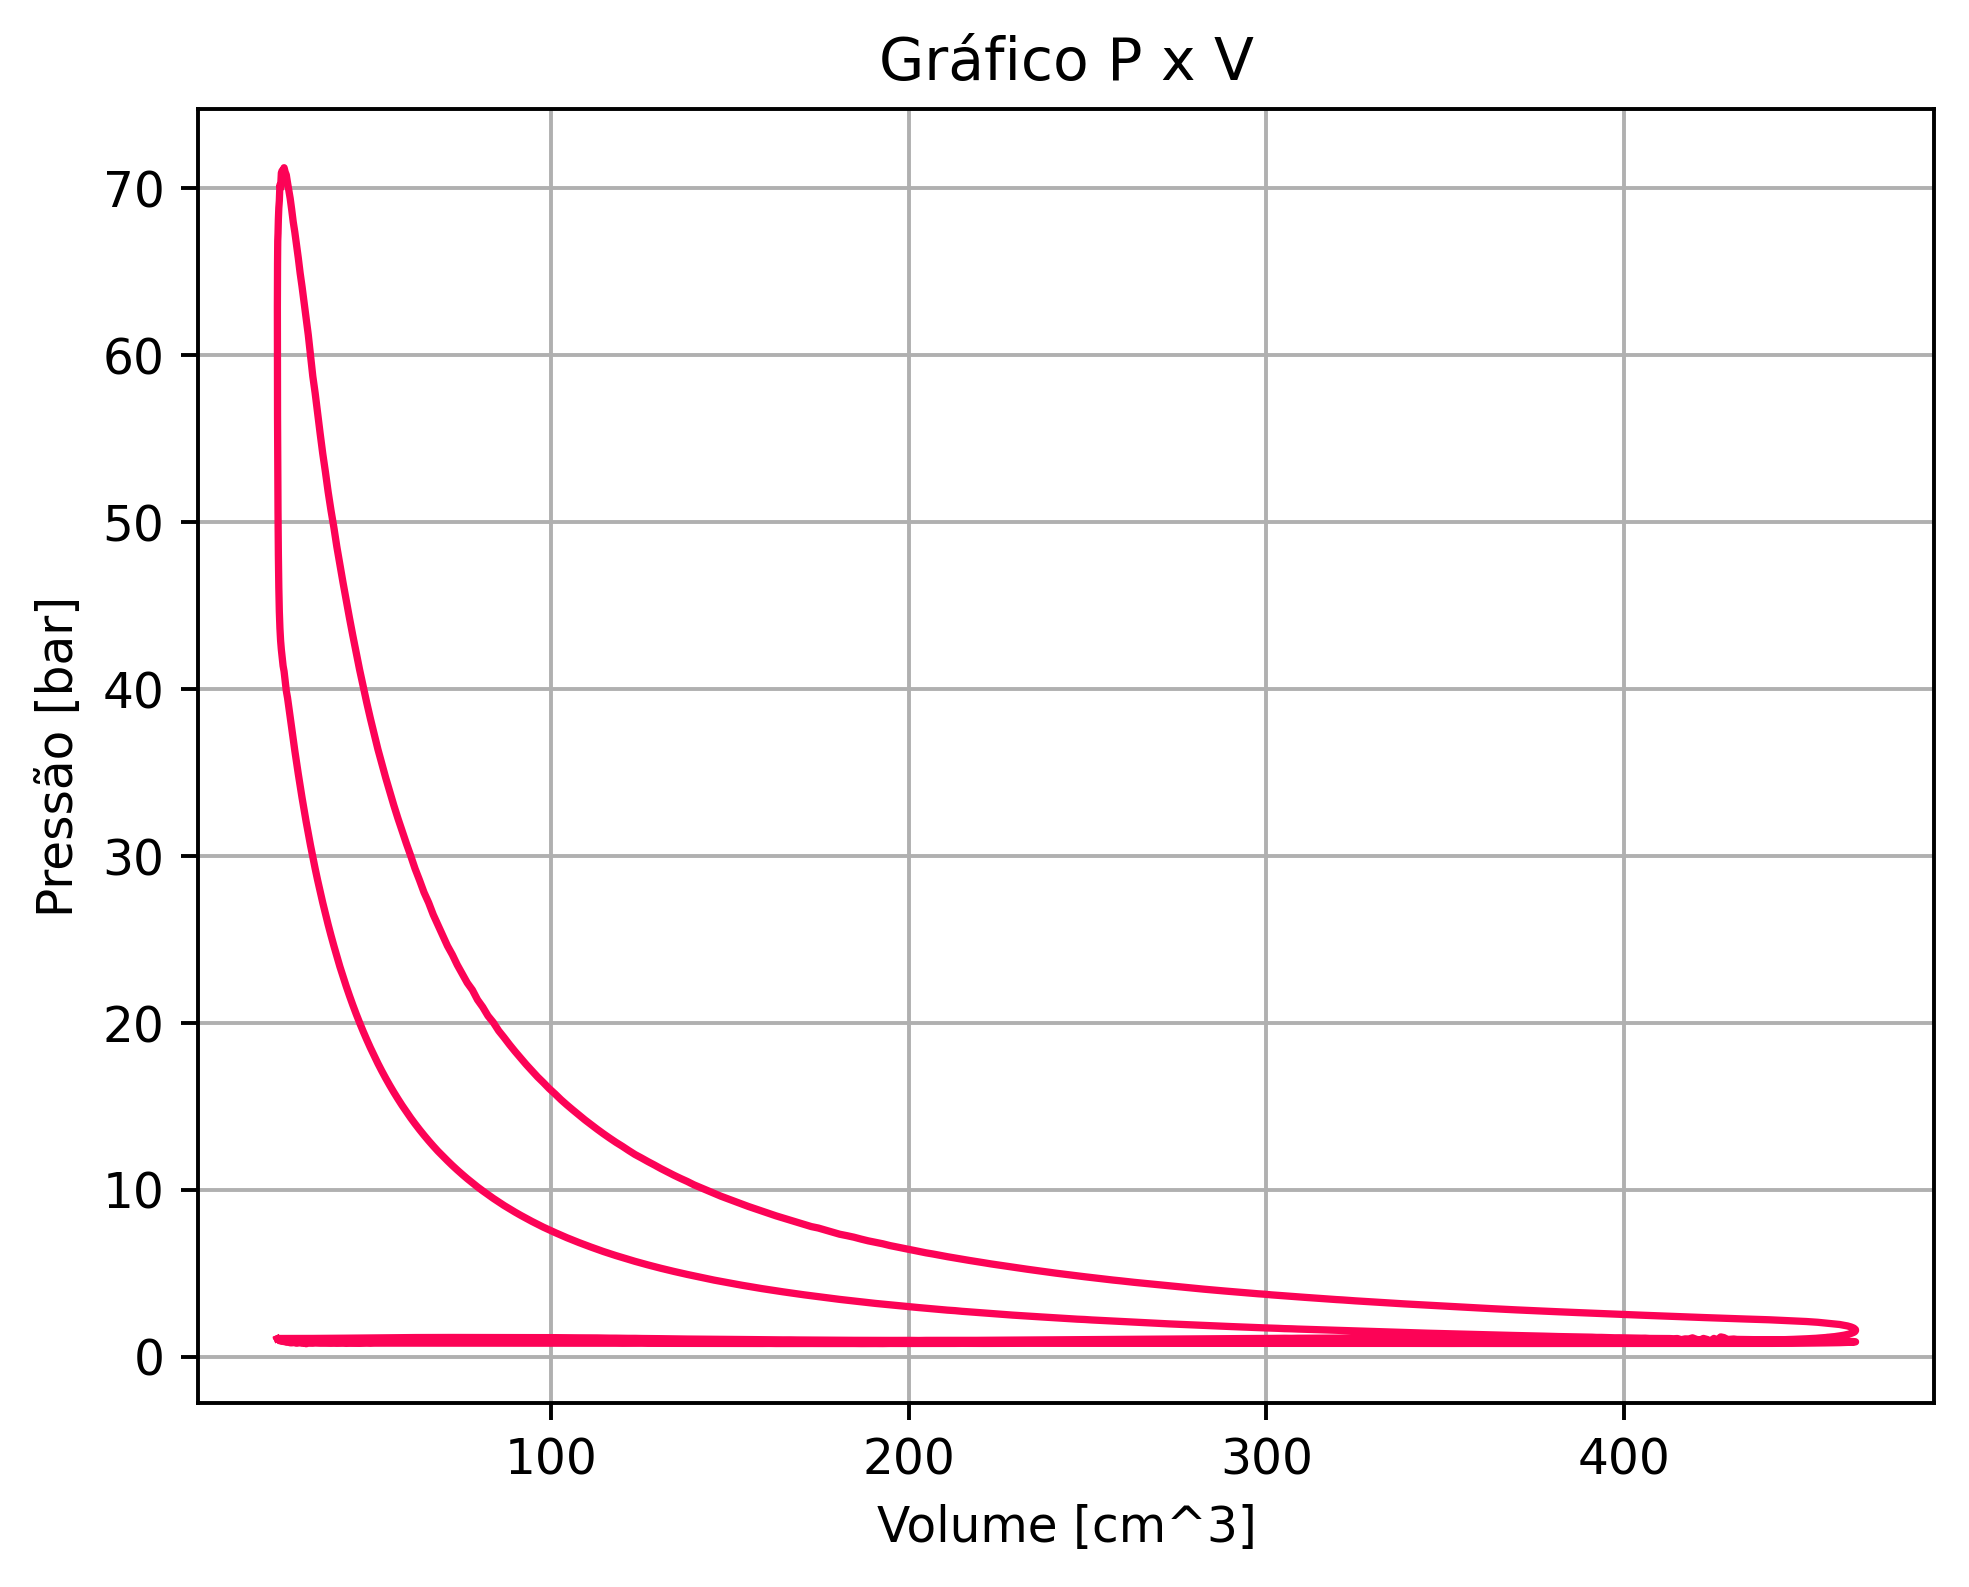

In [15]:
plt.figure(dpi=350)
plt.plot(Vd_numerico,eixo_y,color='#fc0356')
plt.title('Gráfico P x V')
plt.xlabel('Volume [cm^3]')
plt.ylabel('Pressão [bar]')
plt.grid(True)
plt.savefig('P x V.png')
plt.show()

**j)** Considerando que a curva de taxa de liberação de calor, 𝑑𝑄/𝑑𝜃, é dada pela expressão a seguir, 
construa uma coluna 𝑑𝑄/𝑑𝜃 e, em seguida, esboce o gráfico, nomeie e formate os eixos para a curva 

$$\frac{dQ}{d\theta} = \frac{\gamma}{\gamma - 1} \times p \times\frac{dV}{d\theta} + \frac{1}{\gamma - 1}\times V \times \frac{dp}{d\theta}$$


 Onde 𝛾 é a razão dos calores específicos. 

In [16]:
# Resolvendo dV/dtheta

cp = 1.0048  #kJ/kgK
cv = 0.717   #kJ/kgK

gamma = cp/cv

eixo_y_linha = Vd_numerico
eixo_x_linha = eixo_x

dV_dtheta = np.gradient(eixo_y_linha,eixo_x_linha)
#print(dV_dtheta)

dq_dtheta = ((gamma/(gamma - 1)) * eixo_y * dV_dtheta) + ((1/(gamma - 1)) * (df['Volume do Cilindro (cm³)'].values * dp_dtheta))

df_dQ_dtheta = pd.DataFrame(dq_dtheta, columns=['dQ/dθ'])
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df_dQ_dtheta.head()


,dQ/dθ
0,-0.963828384656341
1,-0.766855276229075
2,-0.664915324876323
3,-0.859654022289849
4,-0.652656017740952


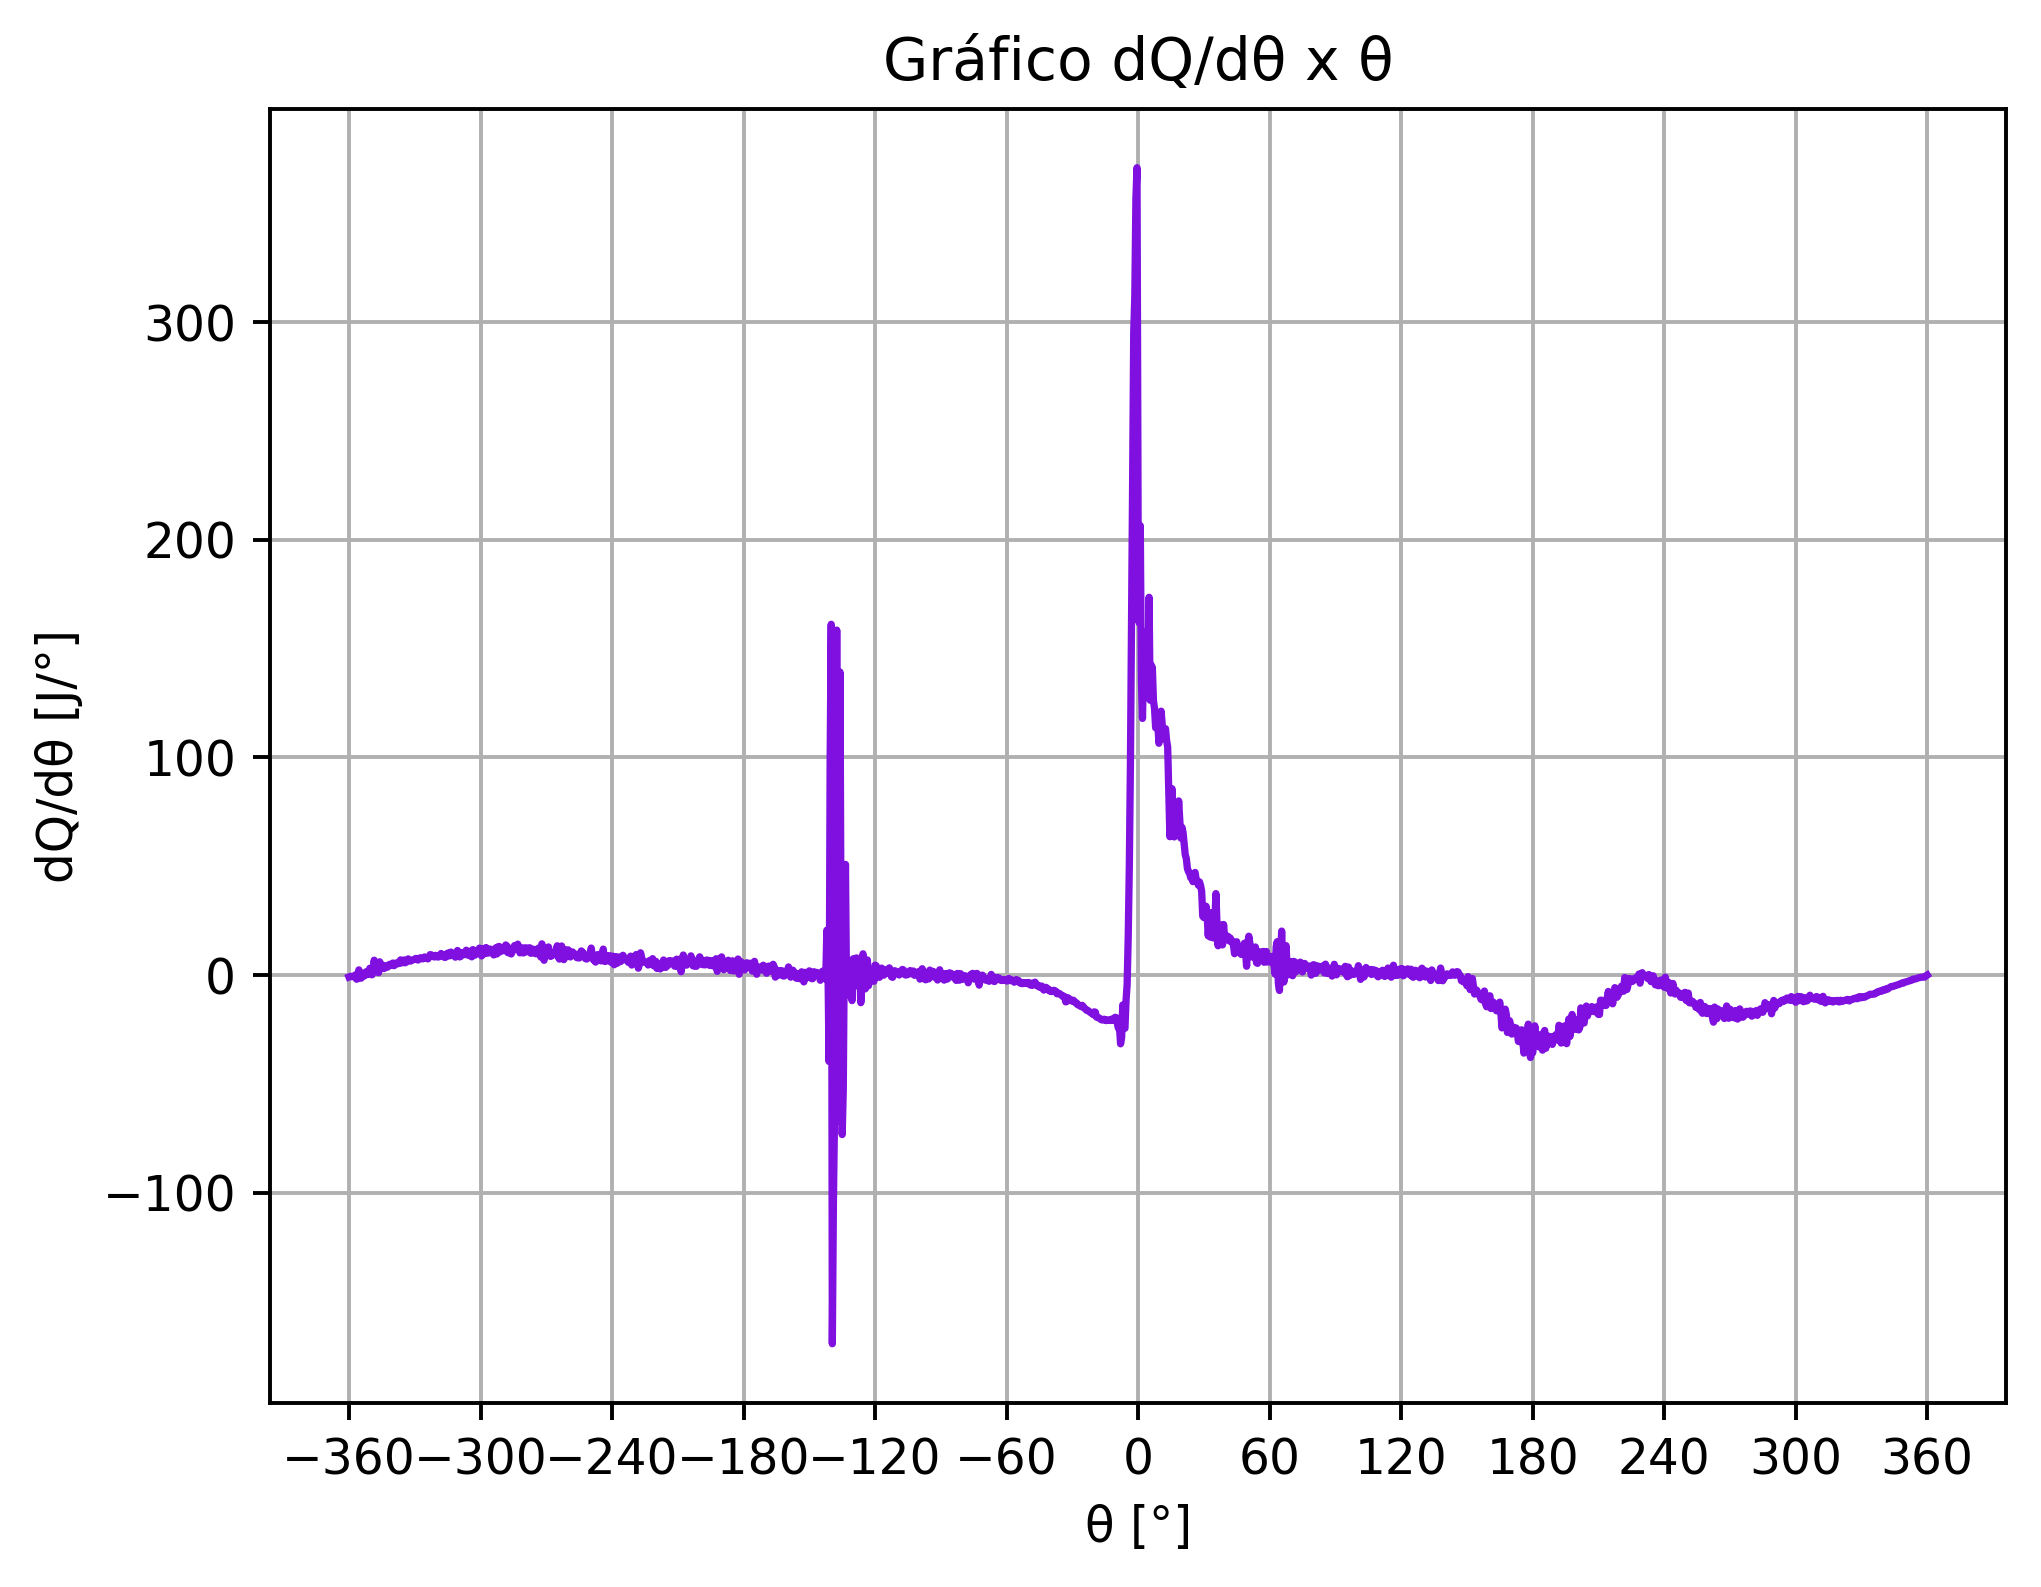

In [17]:
plt.figure(dpi=350)
plt.plot(eixo_x, df_dQ_dtheta['dQ/dθ'].values, color='#7f10e0')
plt.title('Gráfico dQ/dθ x θ')
plt.xlabel('θ [°]')
plt.xticks(np.arange(-360, 361, 60))
plt.ylabel('dQ/dθ [J/°]')
plt.grid(True)
plt.show()

**k)** Identifique o valor e onde ocorre a máxima taxa de liberação de calor.

In [18]:
dQ_dtheta_max = np.max(df_dQ_dtheta['dQ/dθ'].values)
angulo_dQ_dtheta_max = eixo_x[np.argmax(df_dQ_dtheta['dQ/dθ'].values)]

display(Math(r'\text{Máximo valor da taxa de liberação de calor } %.3f \, \text{J/°}' % dQ_dtheta_max))
display(Math(r' \text{O ângulo onde ocorre o valor máximo da derivada da pressão do cilíndro é } %.2f \, \text{°.}'%angulo_dQ_dtheta_max))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**l)** Há duas formas de se estimar o ponto onde se inicia a combustão (SOC – Start Of Combustion): 

i) Considerando a curva 𝑑𝑝/𝑑𝜃, onde o SOC é dado pelo ponto de mínimo (de valor positivo) após o 
início da injeção do combustível (SOI) 

ii) Considerando a curva 𝑑𝑄/𝑑𝜃, onde o SOC é dado pelo ponto onde a curva cruza o eixo das 
abscissas após o SOI. 

Considerando que o início da injeção, SOI, ocorre em −22°, utilize ambas as abordagens acima e 
estime o valor de SOC para cada caso. Apresente a diferença percentual entre esses SOCs.

In [19]:
SOI = -22   # Definindo o ponto da injeção como -22° (eixo do ângulo da manivela)

# Convertendo os dataframes para arrays para realizar as devidas operações vetoriais 
angulo_array = np.array(eixo_x)
dp_dtheta_array = np.array(dp_dtheta)
dq_dtheta_array = np.array(dq_dtheta)


In [20]:
# Pegando um array com índices onde os valores dos ângulos são maiores ou iguais a -22°C
indice_SOI = np.where(angulo_array >= SOI)[0][0]
print("Índice do SOI:", indice_SOI)

Índice do SOI: 676


#### Abordagem I) Considerando a curva $dp/d\theta$

In [21]:
# Criar máscara para região de interesse (entre -22° e 0°)
mask = (angulo_array >= -22) & (angulo_array <= 0)

# Filtrar dados para região de interesse
angle_roi = angulo_array[mask]
dp_dtheta_roi = dp_dtheta[mask]

# Encontrar mínimos locais
local_min_indices = argrelextrema(dp_dtheta_roi, np.less, order=5)[0]

# Pegar o primeiro mínimo local
soc_1 = angle_roi[local_min_indices[0]]
soc_val_1 = dp_dtheta_roi[local_min_indices[0]]

display(Math(rf'\text{{SOC pelo método }} \frac{{dp}}{{d\theta}} = {soc_1:.2f}^\circ'))

<IPython.core.display.Math object>

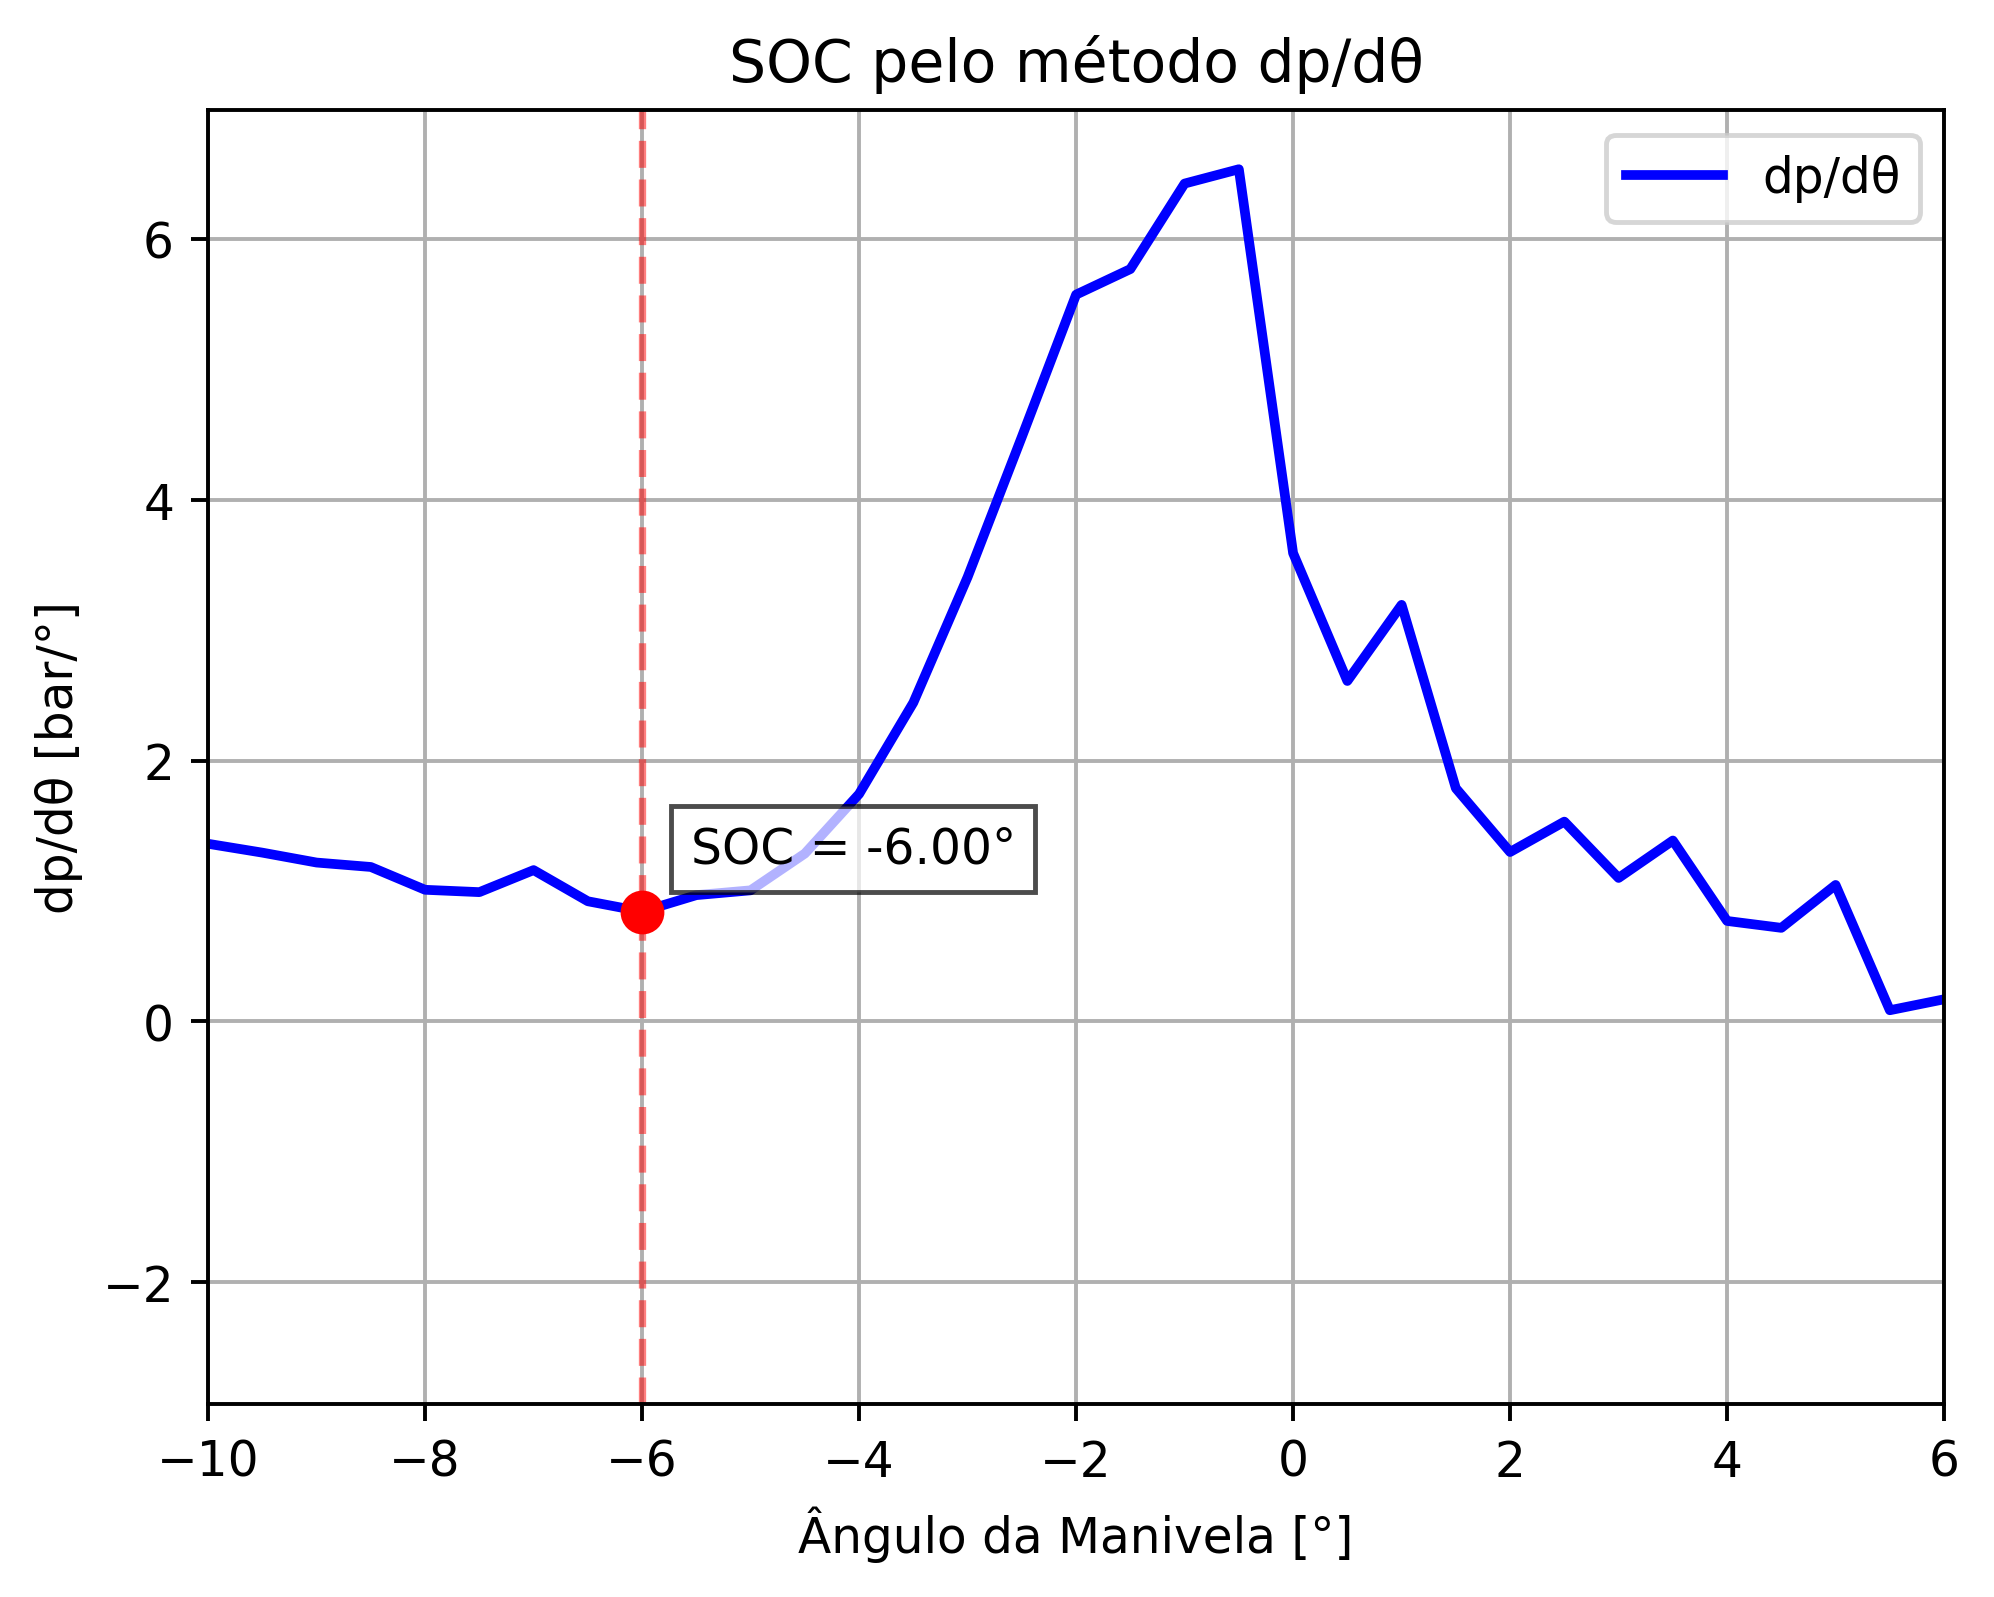

In [22]:
plt.figure(dpi=350)
plt.plot(angulo_array, dp_dtheta, 'b-', label='dp/dθ', linewidth=2)
plt.plot(soc_1, soc_val_1, 'ro', markersize=8)
plt.axvline(x=soc_1, color='r', linestyle='--', alpha=0.5)
plt.annotate(f'SOC = {soc_1:.2f}°', 
            xy=(soc_1, soc_val_1),
            xytext=(10, 10),
            textcoords='offset points',
            bbox=dict(facecolor='white', edgecolor='black', alpha=0.7))
plt.grid(True)
plt.xlabel('Ângulo da Manivela [°]')
plt.ylabel('dp/dθ [bar/°]')
plt.xlim(-10,6)
plt.title('SOC pelo método dp/dθ')
plt.legend()

plt.show()

#### Abordagem II) Considerando a curva $dQ/d\theta$

In [23]:
dQ_dtheta_after_SOI = dq_dtheta_array[indice_SOI:]  
crossing_zero_indices = np.where(np.diff(np.sign(dQ_dtheta_after_SOI)))[0]  # Calculando a diferença entre os sinais consecutivos (positivo ou negativo), o que indica segmentos do eixo zero

# verificação de segurança para evitar erros de índice.
if len(crossing_zero_indices) > 0:
    soc_2 = eixo_x[indice_SOI:][crossing_zero_indices[0]]
    display(Math(rf'\text{{SOC pelo método }} \frac{{dQ}}{{d\theta}} = {soc_2:.2f}^\circ'))
else:
    soc_2 = None
    print("Nenhum cruzamento de zero encontrado para dQ/dθ.")


<IPython.core.display.Math object>

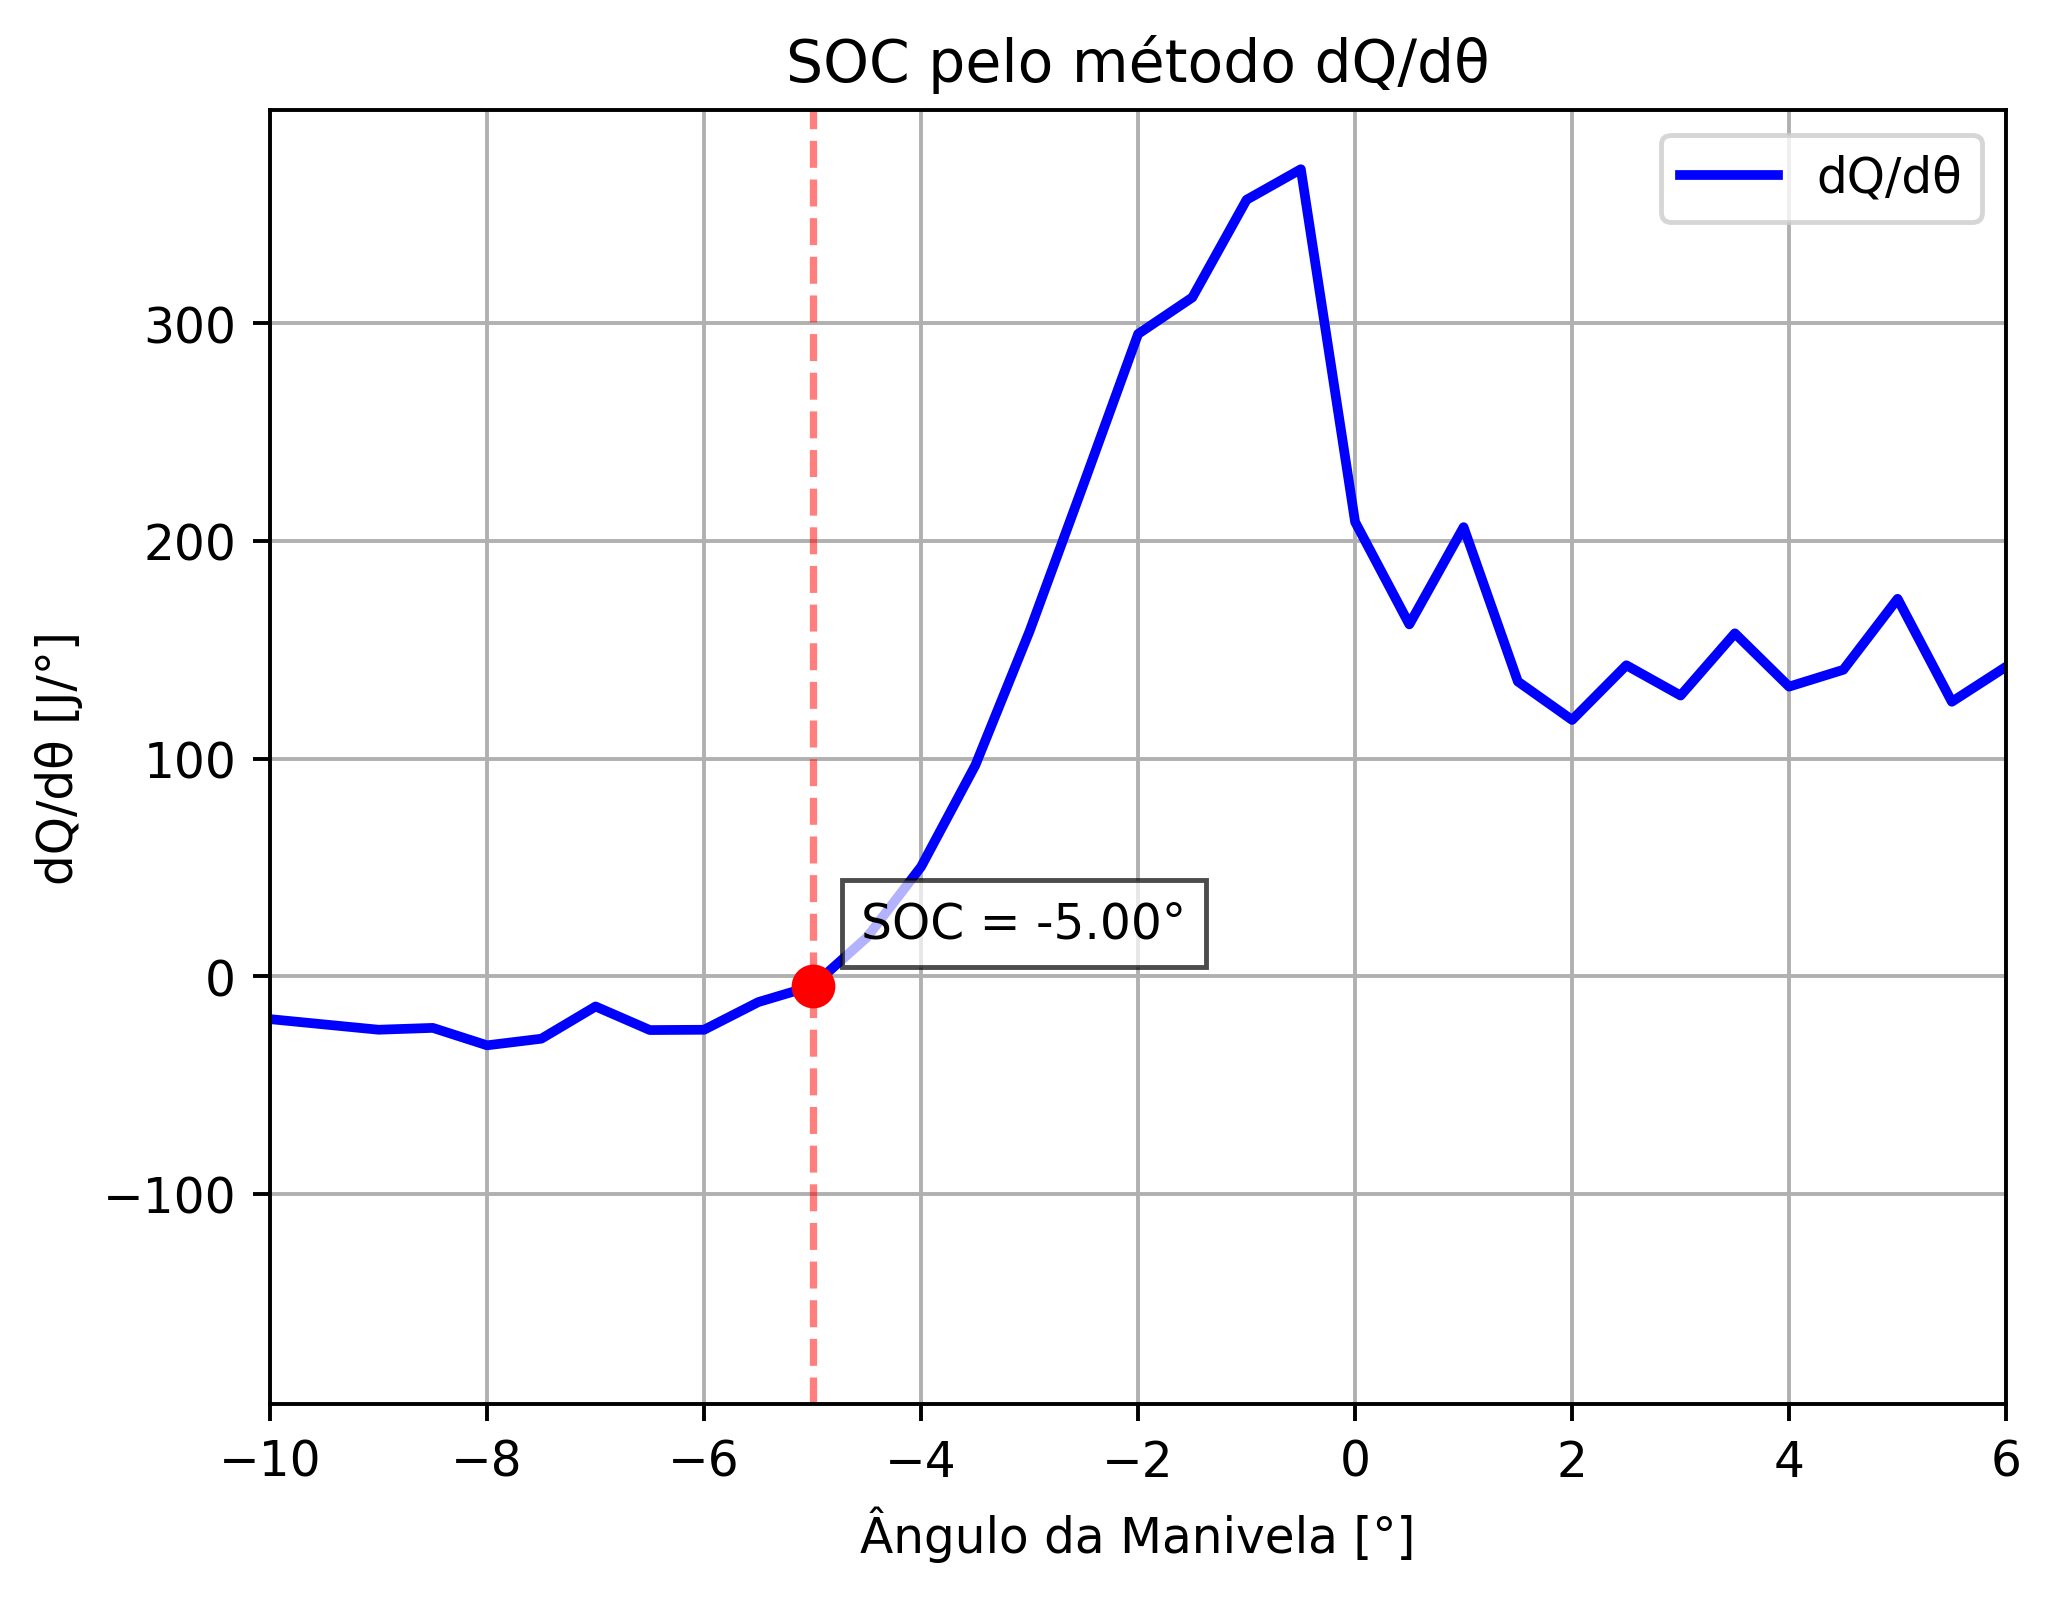

In [36]:
plt.figure(dpi=350)
plt.plot(eixo_x, dq_dtheta_array, 'b-', label='dQ/dθ', linewidth=2)
if soc_2 is not None:
    plt.plot(soc_2, dq_dtheta_array[indice_SOI:][crossing_zero_indices[0]], 'ro', markersize=8)
    plt.axvline(x=soc_2, color='r', linestyle='--', alpha=0.5)
    plt.annotate(f'SOC = {soc_2:.2f}°', 
                 xy=(soc_2, dq_dtheta_array[indice_SOI:][crossing_zero_indices[0]]),
                 xytext=(10, 10),
                 textcoords='offset points',
                 bbox=dict(facecolor='white', edgecolor='black', alpha=0.7))
plt.grid(True)
plt.xlabel('Ângulo da Manivela [°]')
plt.ylabel('dQ/dθ [J/°]')
plt.xlim(-10, 6)
plt.title('SOC pelo método dQ/dθ')
plt.legend()

plt.show()

#### Diferença entre os métodos

A diferença porcentual entre os dois métodos é calculada a partir da seguinte fórmula:

$$\frac{SOC_{ii} - SOC_{i}}{SOC_{i}} \times 100$$

onde os subíndices $i$ e $ii$, indicam, respectivamente os SOC encontrados pelo primeiro e segundo método sugeridos.

In [25]:
diff_percent = np.abs((soc_2 - soc_1) / soc_1) * 100
display(Math(rf'\text{{Diferença percentual entre os métodos: }} {diff_percent:.2f}\%'))

<IPython.core.display.Math object>

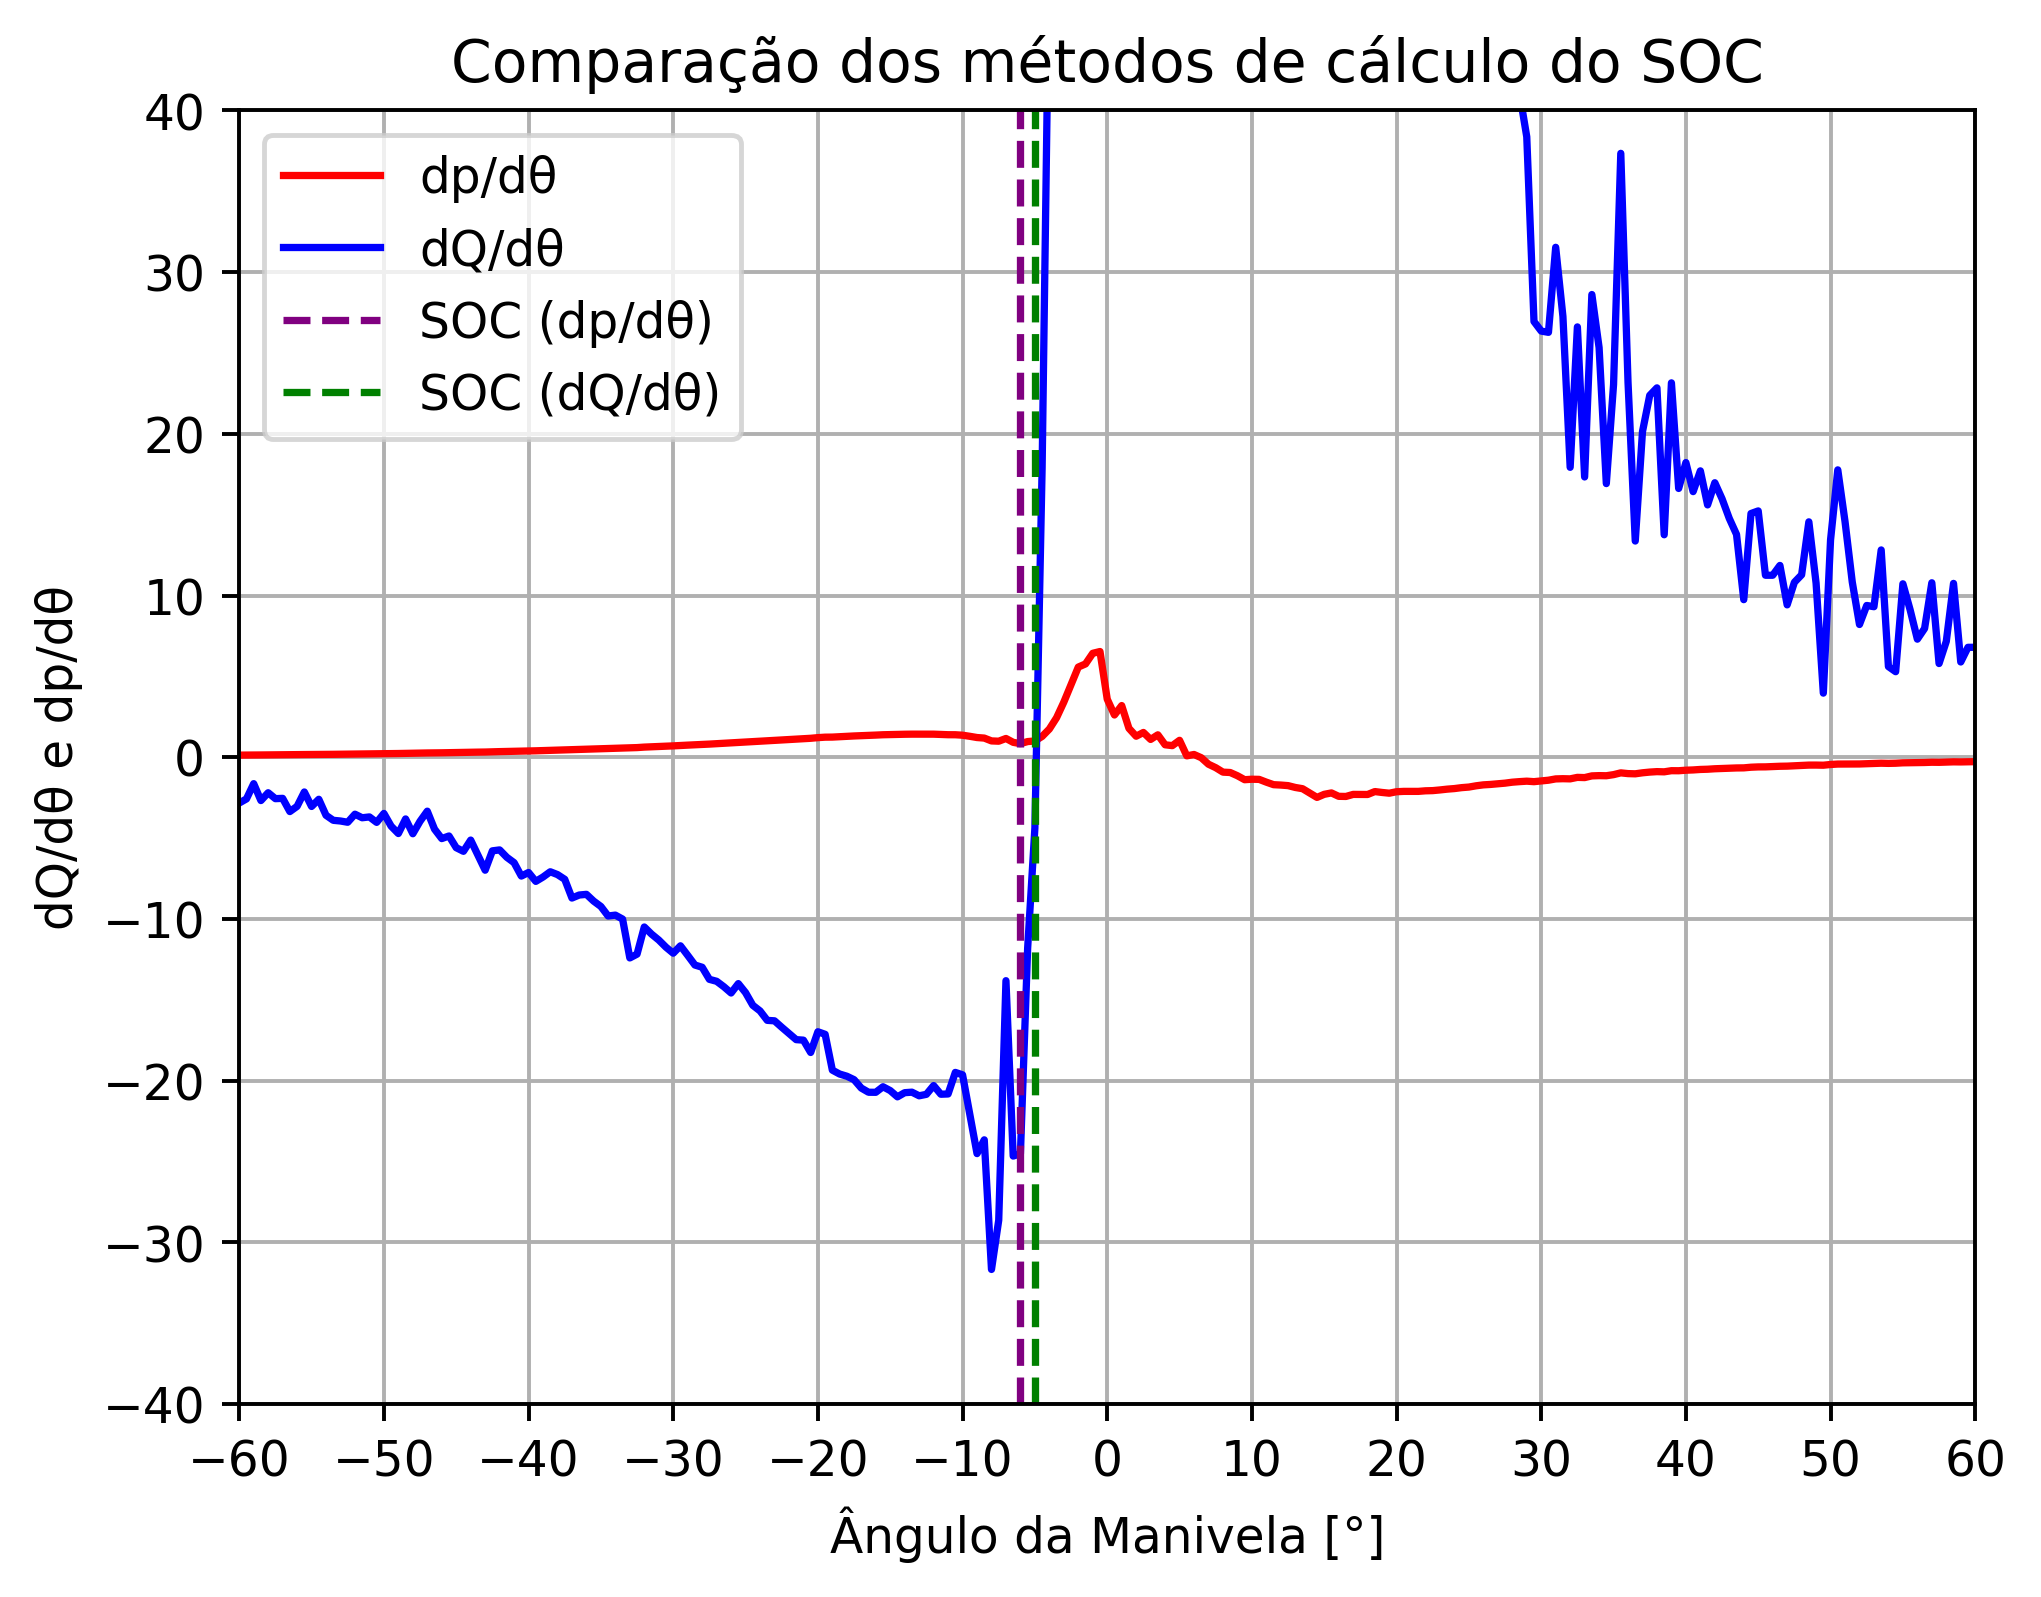

In [26]:
plt.figure(dpi=350)
plt.plot(eixo_x, dp_dtheta, label='dp/dθ', color='red')
plt.plot(eixo_x, dq_dtheta, label='dQ/dθ', color='blue')
plt.axvline(soc_1, color='purple', linestyle='--', label='SOC (dp/dθ)')
plt.axvline(soc_2, color='green', linestyle='--', label='SOC (dQ/dθ)')
plt.xlabel('Ângulo da Manivela [°]')
plt.xticks(np.arange(-60, 61, 10))
plt.xlim(-60, 60)
plt.ylabel('dQ/dθ e dp/dθ')
plt.yticks(np.arange(-40, 41, 10))
plt.ylim(-40, 40)
plt.title('Comparação dos métodos de cálculo do SOC')
plt.legend()
plt.grid(True)
plt.show()

